# Training data estimation

## Learning curves

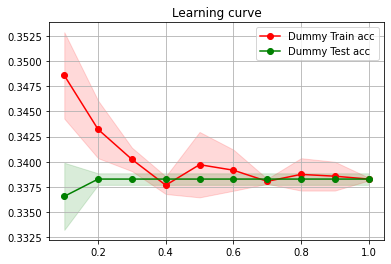

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
rseed = 42
train_sizes = np.linspace(0.1, 1.0, 10)
#global data
data, target = fetch_openml(data_id=60, return_X_y = True)
#split global data, keep constat seed to get same results
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, stratify=target, random_state=rseed)
#train a dummy model
dmodel = DummyClassifier(strategy='most_frequent')
_, dtrain_scores, dtest_scores = learning_curve(estimator=dmodel, X=X_train, y=y_train, cv=5, train_sizes=train_sizes)
#plots the meadian and sd of train+test
fig, ax = plt.subplots(1)
ax.plot(train_sizes, np.mean(dtrain_scores, axis=1), color='red', marker='o', label='Dummy Train acc')
upper_std = np.mean(dtrain_scores, axis=1) + np.std(dtrain_scores, axis=1)
lower_std = np.mean(dtrain_scores, axis=1) - np.std(dtrain_scores, axis=1)
ax.fill_between(train_sizes, upper_std, lower_std, alpha=0.15, color='red')
ax.plot(train_sizes, np.mean(dtest_scores, axis=1), color='green', marker='o', label='Dummy Test acc')
upper_std = np.mean(dtest_scores, axis=1) + np.std(dtest_scores, axis=1)
lower_std = np.mean(dtest_scores, axis=1) - np.std(dtest_scores, axis=1)
ax.fill_between(train_sizes, upper_std, lower_std, alpha=0.15, color='green')
ax.set_title('Learning curve')
plt.grid()
plt.legend()

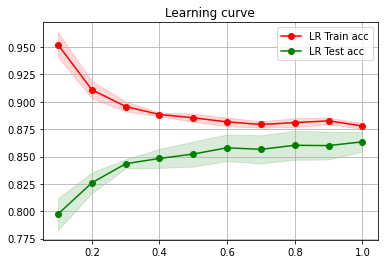

In [2]:
#train a simple model
lrmodel = LogisticRegression(random_state=rseed, max_iter=1000)
_, lrtrain_scores, lrtest_scores = learning_curve(estimator=lrmodel, X=X_train, y=y_train, n_jobs=4, cv=5, train_sizes=train_sizes)
#plots the meadian and sd of train+test
fig, ax = plt.subplots(1)
ax.plot(train_sizes, np.mean(lrtrain_scores, axis=1), color='red', marker='o', label='LR Train acc')
upper_std = np.mean(lrtrain_scores, axis=1) + np.std(lrtrain_scores, axis=1)
lower_std = np.mean(lrtrain_scores, axis=1) - np.std(lrtrain_scores, axis=1)
ax.fill_between(train_sizes, upper_std, lower_std, alpha=0.15, color='red')
ax.plot(train_sizes, np.mean(lrtest_scores, axis=1), color='green', marker='o', label='LR Test acc')
upper_std = np.mean(lrtest_scores, axis=1) + np.std(lrtest_scores, axis=1)
lower_std = np.mean(lrtest_scores, axis=1) - np.std(lrtest_scores, axis=1)
ax.fill_between(train_sizes, upper_std, lower_std, alpha=0.15, color='green')
ax.set_title('Learning curve')
plt.grid()
plt.legend()

## Data Augmentation

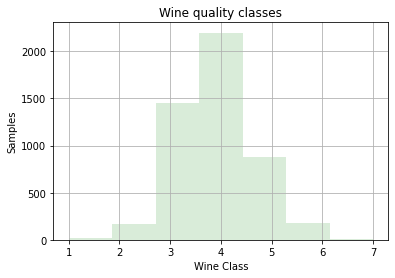

In [3]:
data, target = fetch_openml(data_id=40498, return_X_y = True)
plt.hist(sorted(target), bins=7, align='mid',alpha=0.15, color='green')
plt.title('Wine quality classes')
plt.xlabel('Wine Class')
plt.ylabel('Samples')
plt.grid()
plt.show()

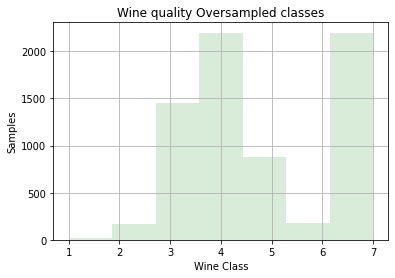

In [4]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=rseed, sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(data, target)
plt.hist(sorted(y_resampled), bins=7, align='mid',alpha=0.15, color='green')
plt.title('Wine quality Oversampled classes')
plt.xlabel('Wine Class')
plt.ylabel('Samples')
plt.grid()
plt.show()

## Model space

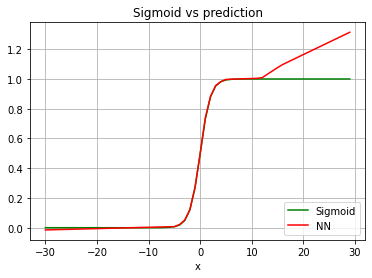

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

data = np.linspace(-10, 10, 100) 
target = sigmoid(data)

model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(data,target, epochs=1000, verbose=0)

data = np.arange(-30.0, 30.0, 1.0)
pred = model.predict(data)
target = sigmoid(data)

plt.plot(data, target, color='green', label='Sigmoid') 
plt.plot(data, pred, color='red', label='NN') 
plt.title('Sigmoid vs prediction')
plt.xlabel("x") 
plt.grid()
plt.legend(loc='lower right')
plt.show() 